In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split


import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# EDA

In [3]:
df.shape

(517, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [7]:
df.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [8]:
pd.set_option("display.max_columns", 31)
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


# Visualization

In [9]:
y_count = df.size_category.value_counts().reset_index().rename(columns={'index':'size_category', 'size_category':'counts'})

,size_category,counts
0,small,378
1,large,139


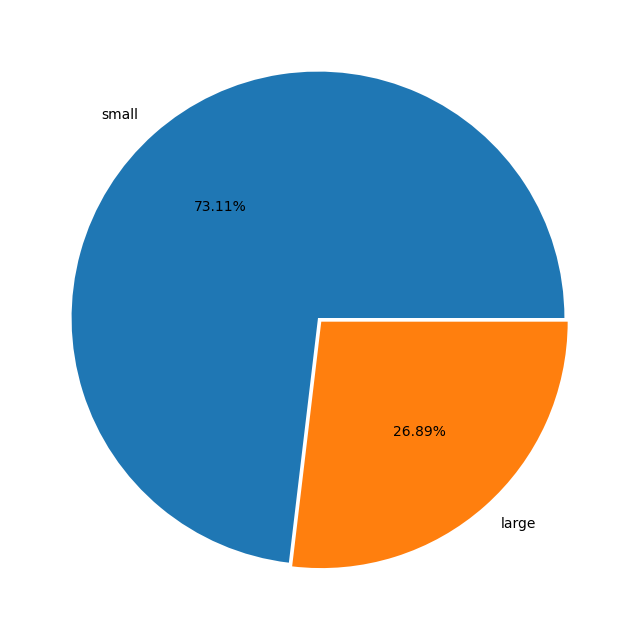

In [10]:
plt.figure(figsize=(8,8))
plt.pie(y_count.counts, labels=y_count['size_category'], autopct='%1.2f%%', explode=(0,0.02))
y_count

In [11]:
month_df = df.groupby(['size_category', 'month']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
month_df.head(10)

,size_category,month,count
11,small,aug,141
21,small,sep,121
9,large,sep,51
1,large,aug,43
17,small,mar,42
15,small,jul,23
16,small,jun,14
13,small,feb,14
6,large,mar,12
20,small,oct,11


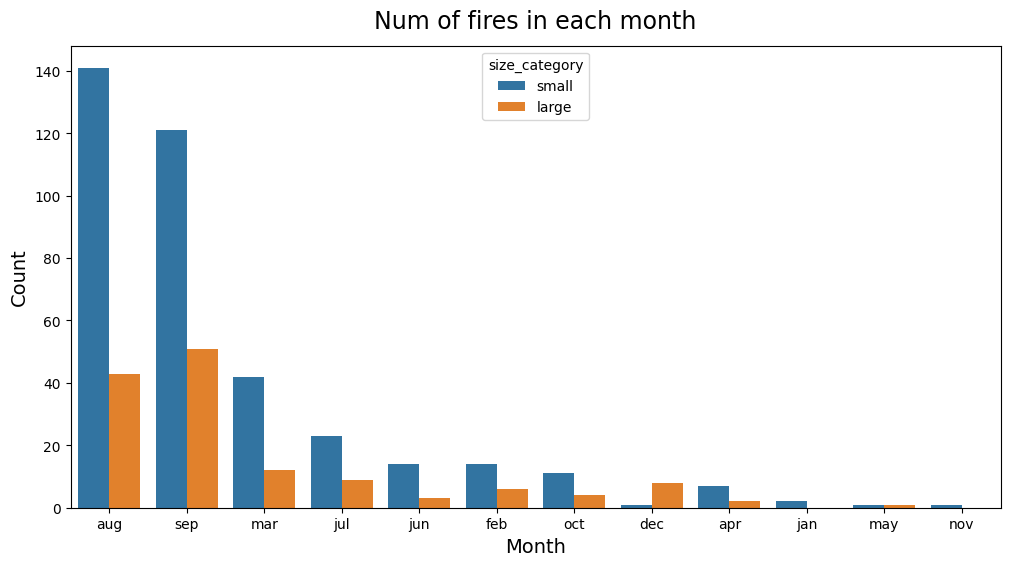

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(x='month', y = 'count', hue='size_category', data= month_df)
plt.title("Num of fires in each month", fontsize=17, y=1.02)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# As seen above,
# August month has seen highest number of small fires.
# September month has seen highest num of large fires.
# Least num of fires occured in month of November.

In [13]:
day_df = df.groupby(['size_category', 'day']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
day_df

,size_category,day,count
10,small,sun,68
7,small,fri,64
9,small,sat,58
8,small,mon,55
11,small,thu,48
12,small,tue,44
13,small,wed,41
3,large,sun,27
2,large,sat,26
0,large,fri,21


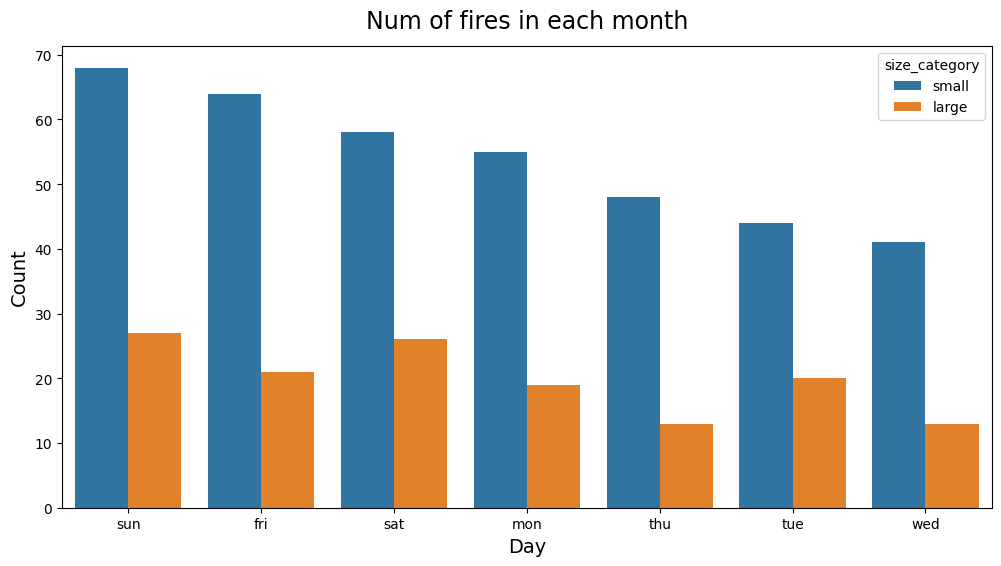

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(x='day', y = 'count', hue='size_category', data= day_df)
plt.title("Num of fires on each day", fontsize=17, y=1.02)
plt.title("Num of fires in each month", fontsize=17, y=1.02)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# As seen,
# Highest num of small as well as large fires have occured on Sunday.
# Lowest num of small fires have occured on Wednesday.
# Lowest num of large fires have occured on Wednesday and Thursday.

# Encoding

In [15]:
labelencoder = LabelEncoder()
df.iloc[:,-1] = labelencoder.fit_transform(df.iloc[:,-1])
df['size_category']
#1 for small, 0 for large

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [16]:
rain_df = df.groupby(['size_category', 'rain']).size().reset_index().rename(columns={0:'count'}).sort_values('count', ascending=False)
rain_df

,size_category,rain,count
2,1,0.0,371
0,0,0.0,138
3,1,0.2,2
5,1,0.8,2
1,0,6.4,1
4,1,0.4,1
6,1,1.0,1
7,1,1.4,1


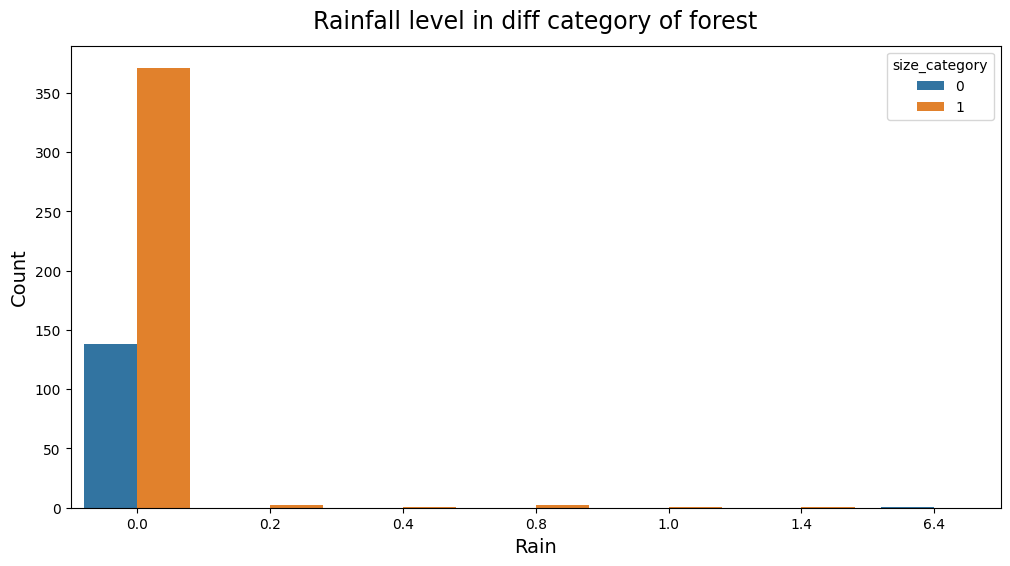

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x='rain', y='count', hue='size_category', data= rain_df)
plt.title("Rainfall level in diff category of forest", y=1.02, fontsize=17)
plt.xlabel('Rain', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

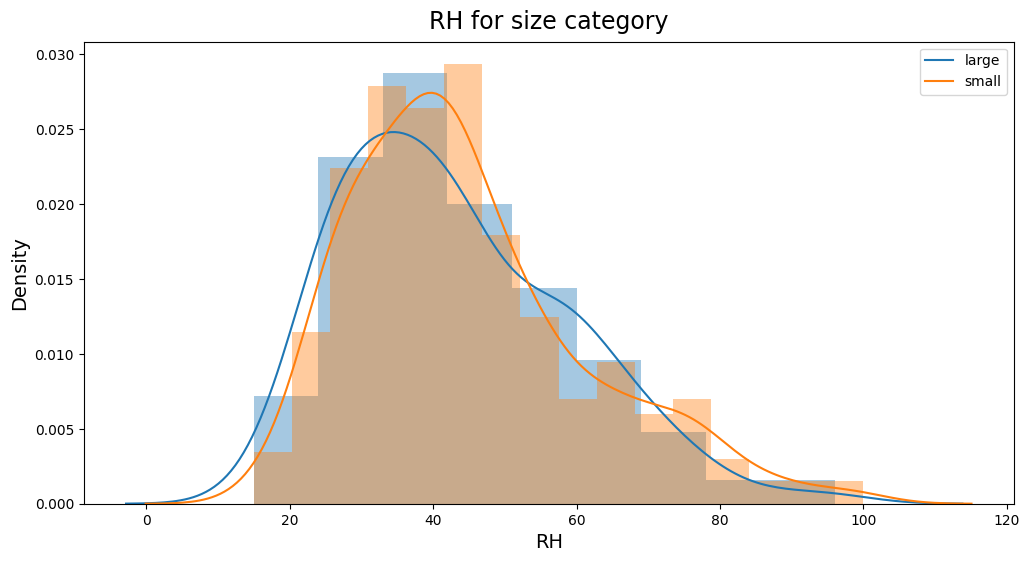

In [18]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['size_category']==0]['RH'])
sns.distplot(df[df['size_category']==1]['RH'])
plt.title("RH for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('RH', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

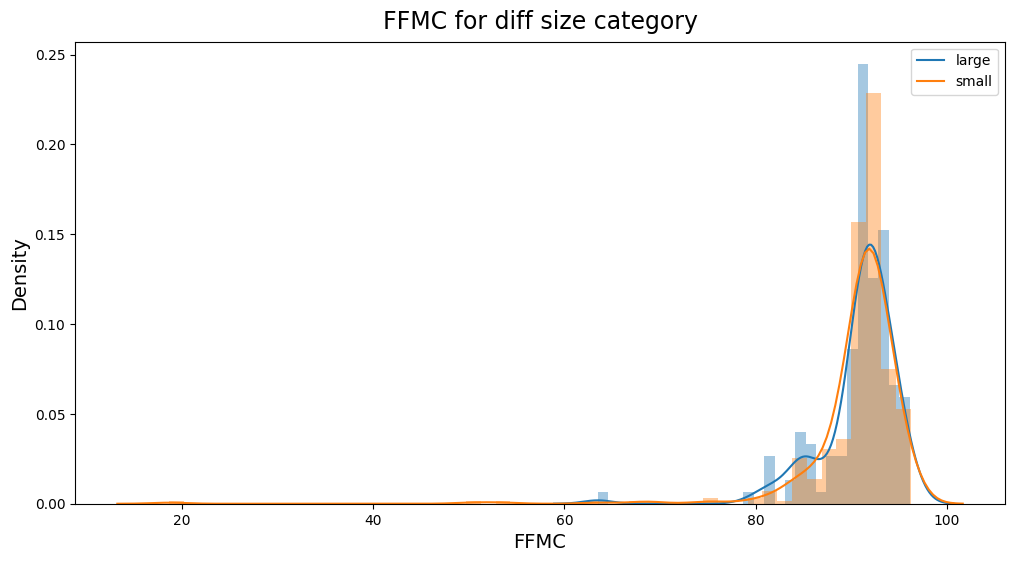

In [19]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['size_category']==0]['FFMC'])
sns.distplot(df[df['size_category']==1]['FFMC'])
plt.title("FFMC for diff size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('FFMC', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

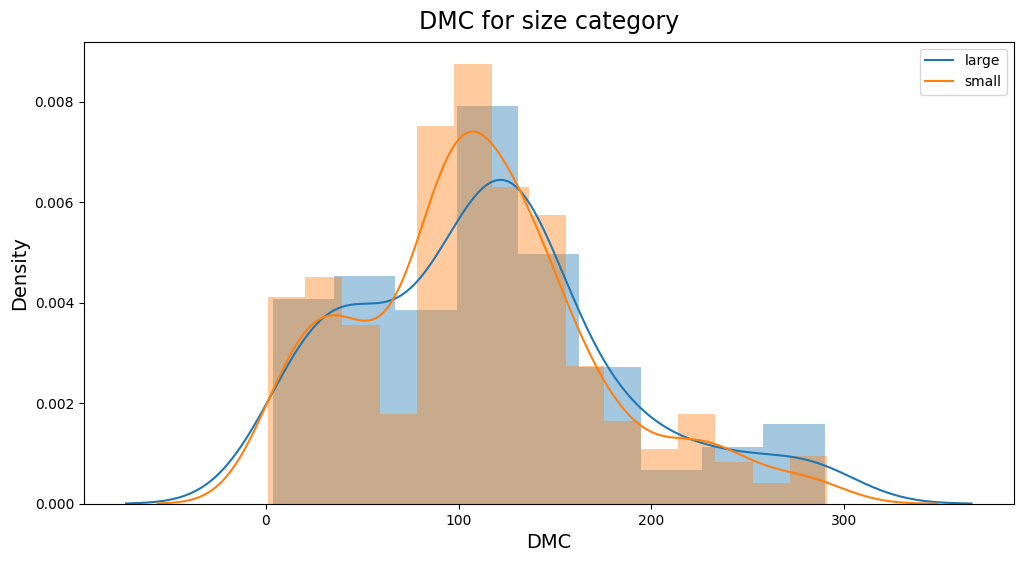

In [20]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['size_category']==0]['DMC'])
sns.distplot(df[df['size_category']==1]['DMC'])
plt.title("DMC for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('DMC', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

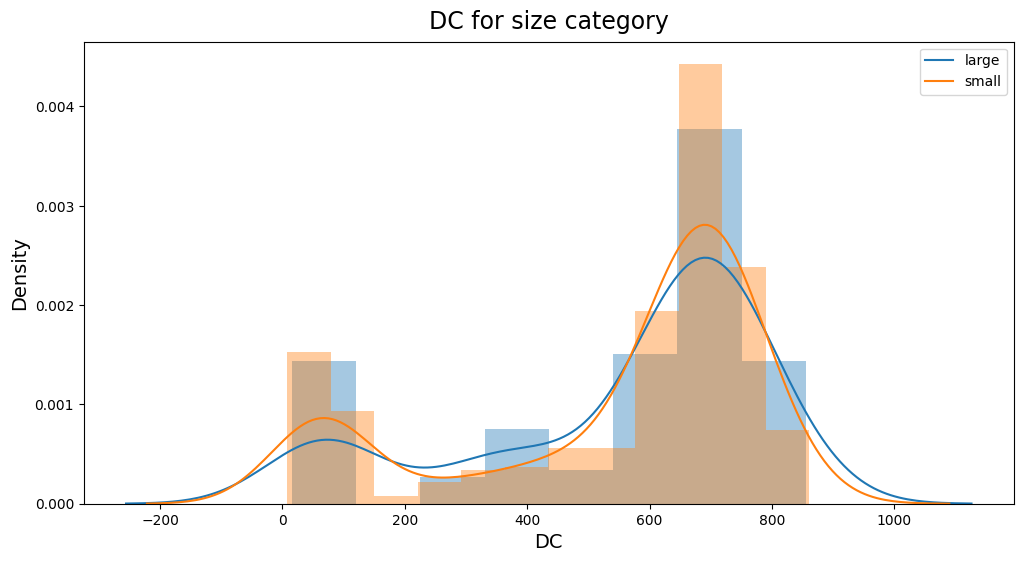

In [21]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['size_category']==0]['DC'])
sns.distplot(df[df['size_category']==1]['DC'])
plt.title("DC for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('DC', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

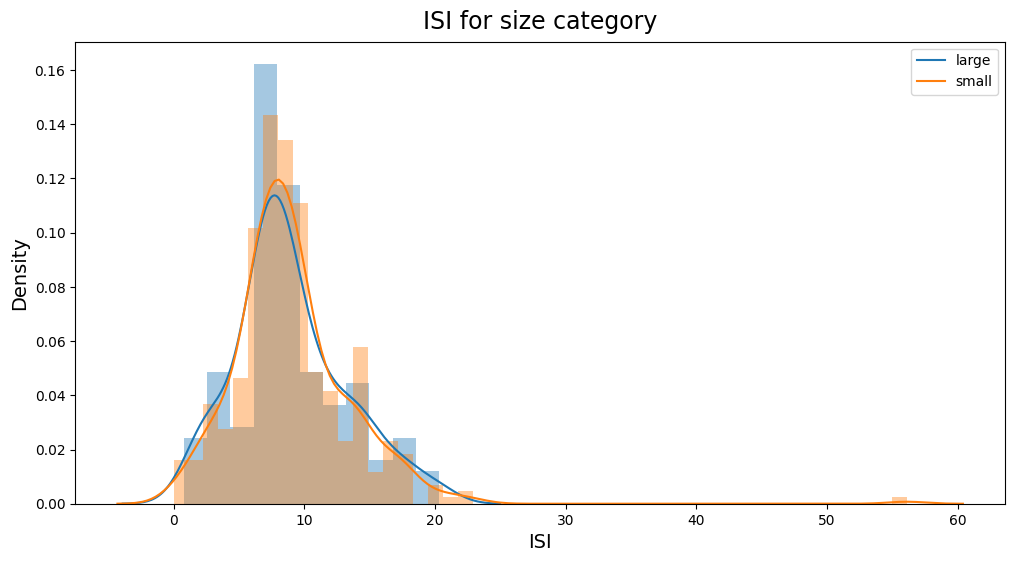

In [22]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['size_category']==0]['ISI'])
sns.distplot(df[df['size_category']==1]['ISI'])
plt.title("ISI for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('ISI', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

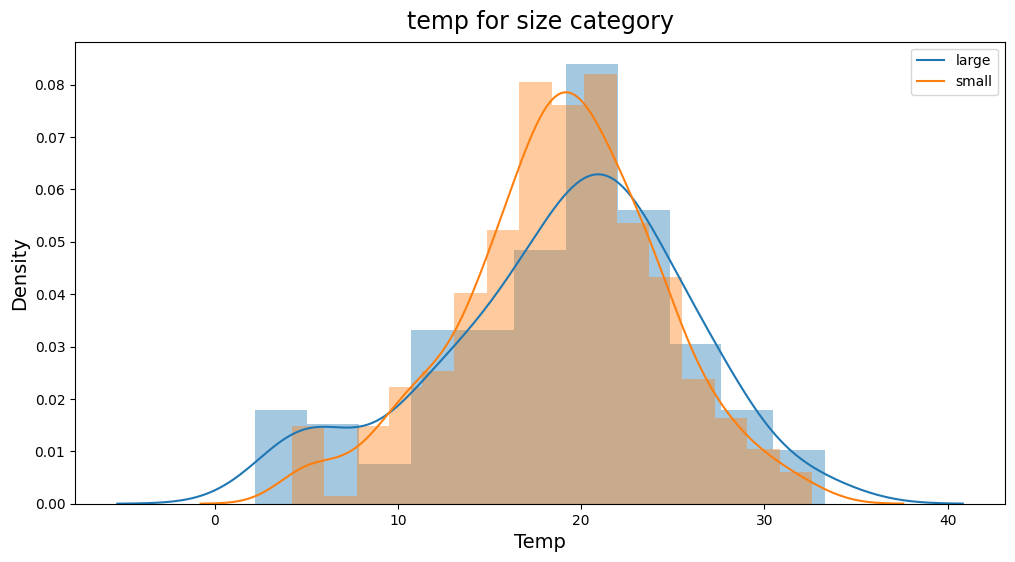

In [23]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['size_category']==0]['temp'])
sns.distplot(df[df['size_category']==1]['temp'])
plt.title("temp for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('Temp', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

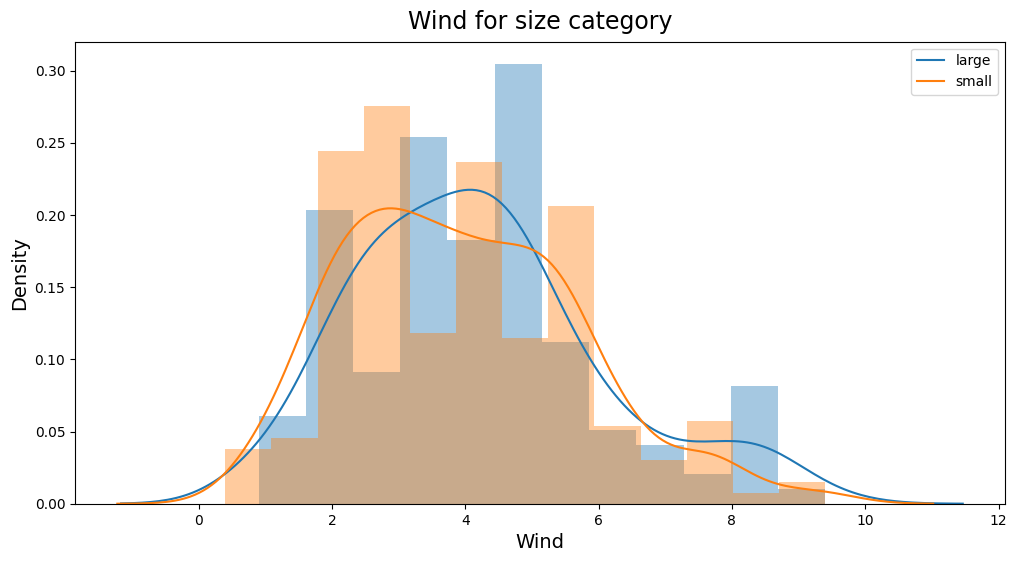

In [24]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['size_category']==0]['wind'])
sns.distplot(df[df['size_category']==1]['wind'])
plt.title("Wind for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('Wind', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

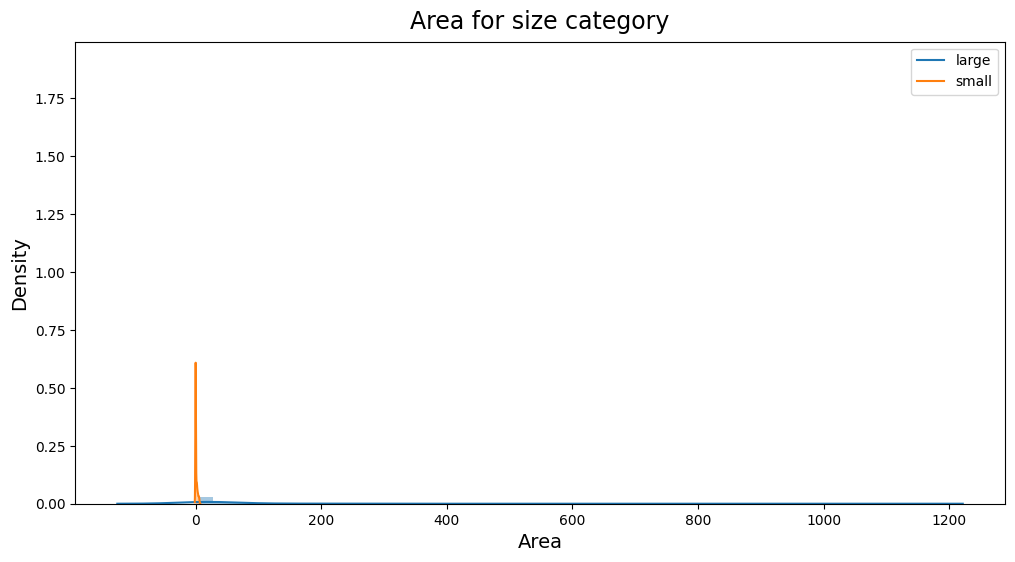

In [25]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['size_category']==0]['area'])
sns.distplot(df[df['size_category']==1]['area'])
plt.title("Area for size category", y=1.01, fontsize=17)
plt.legend(["large", "small"])
plt.xlabel('Area', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

# Outlier Detection

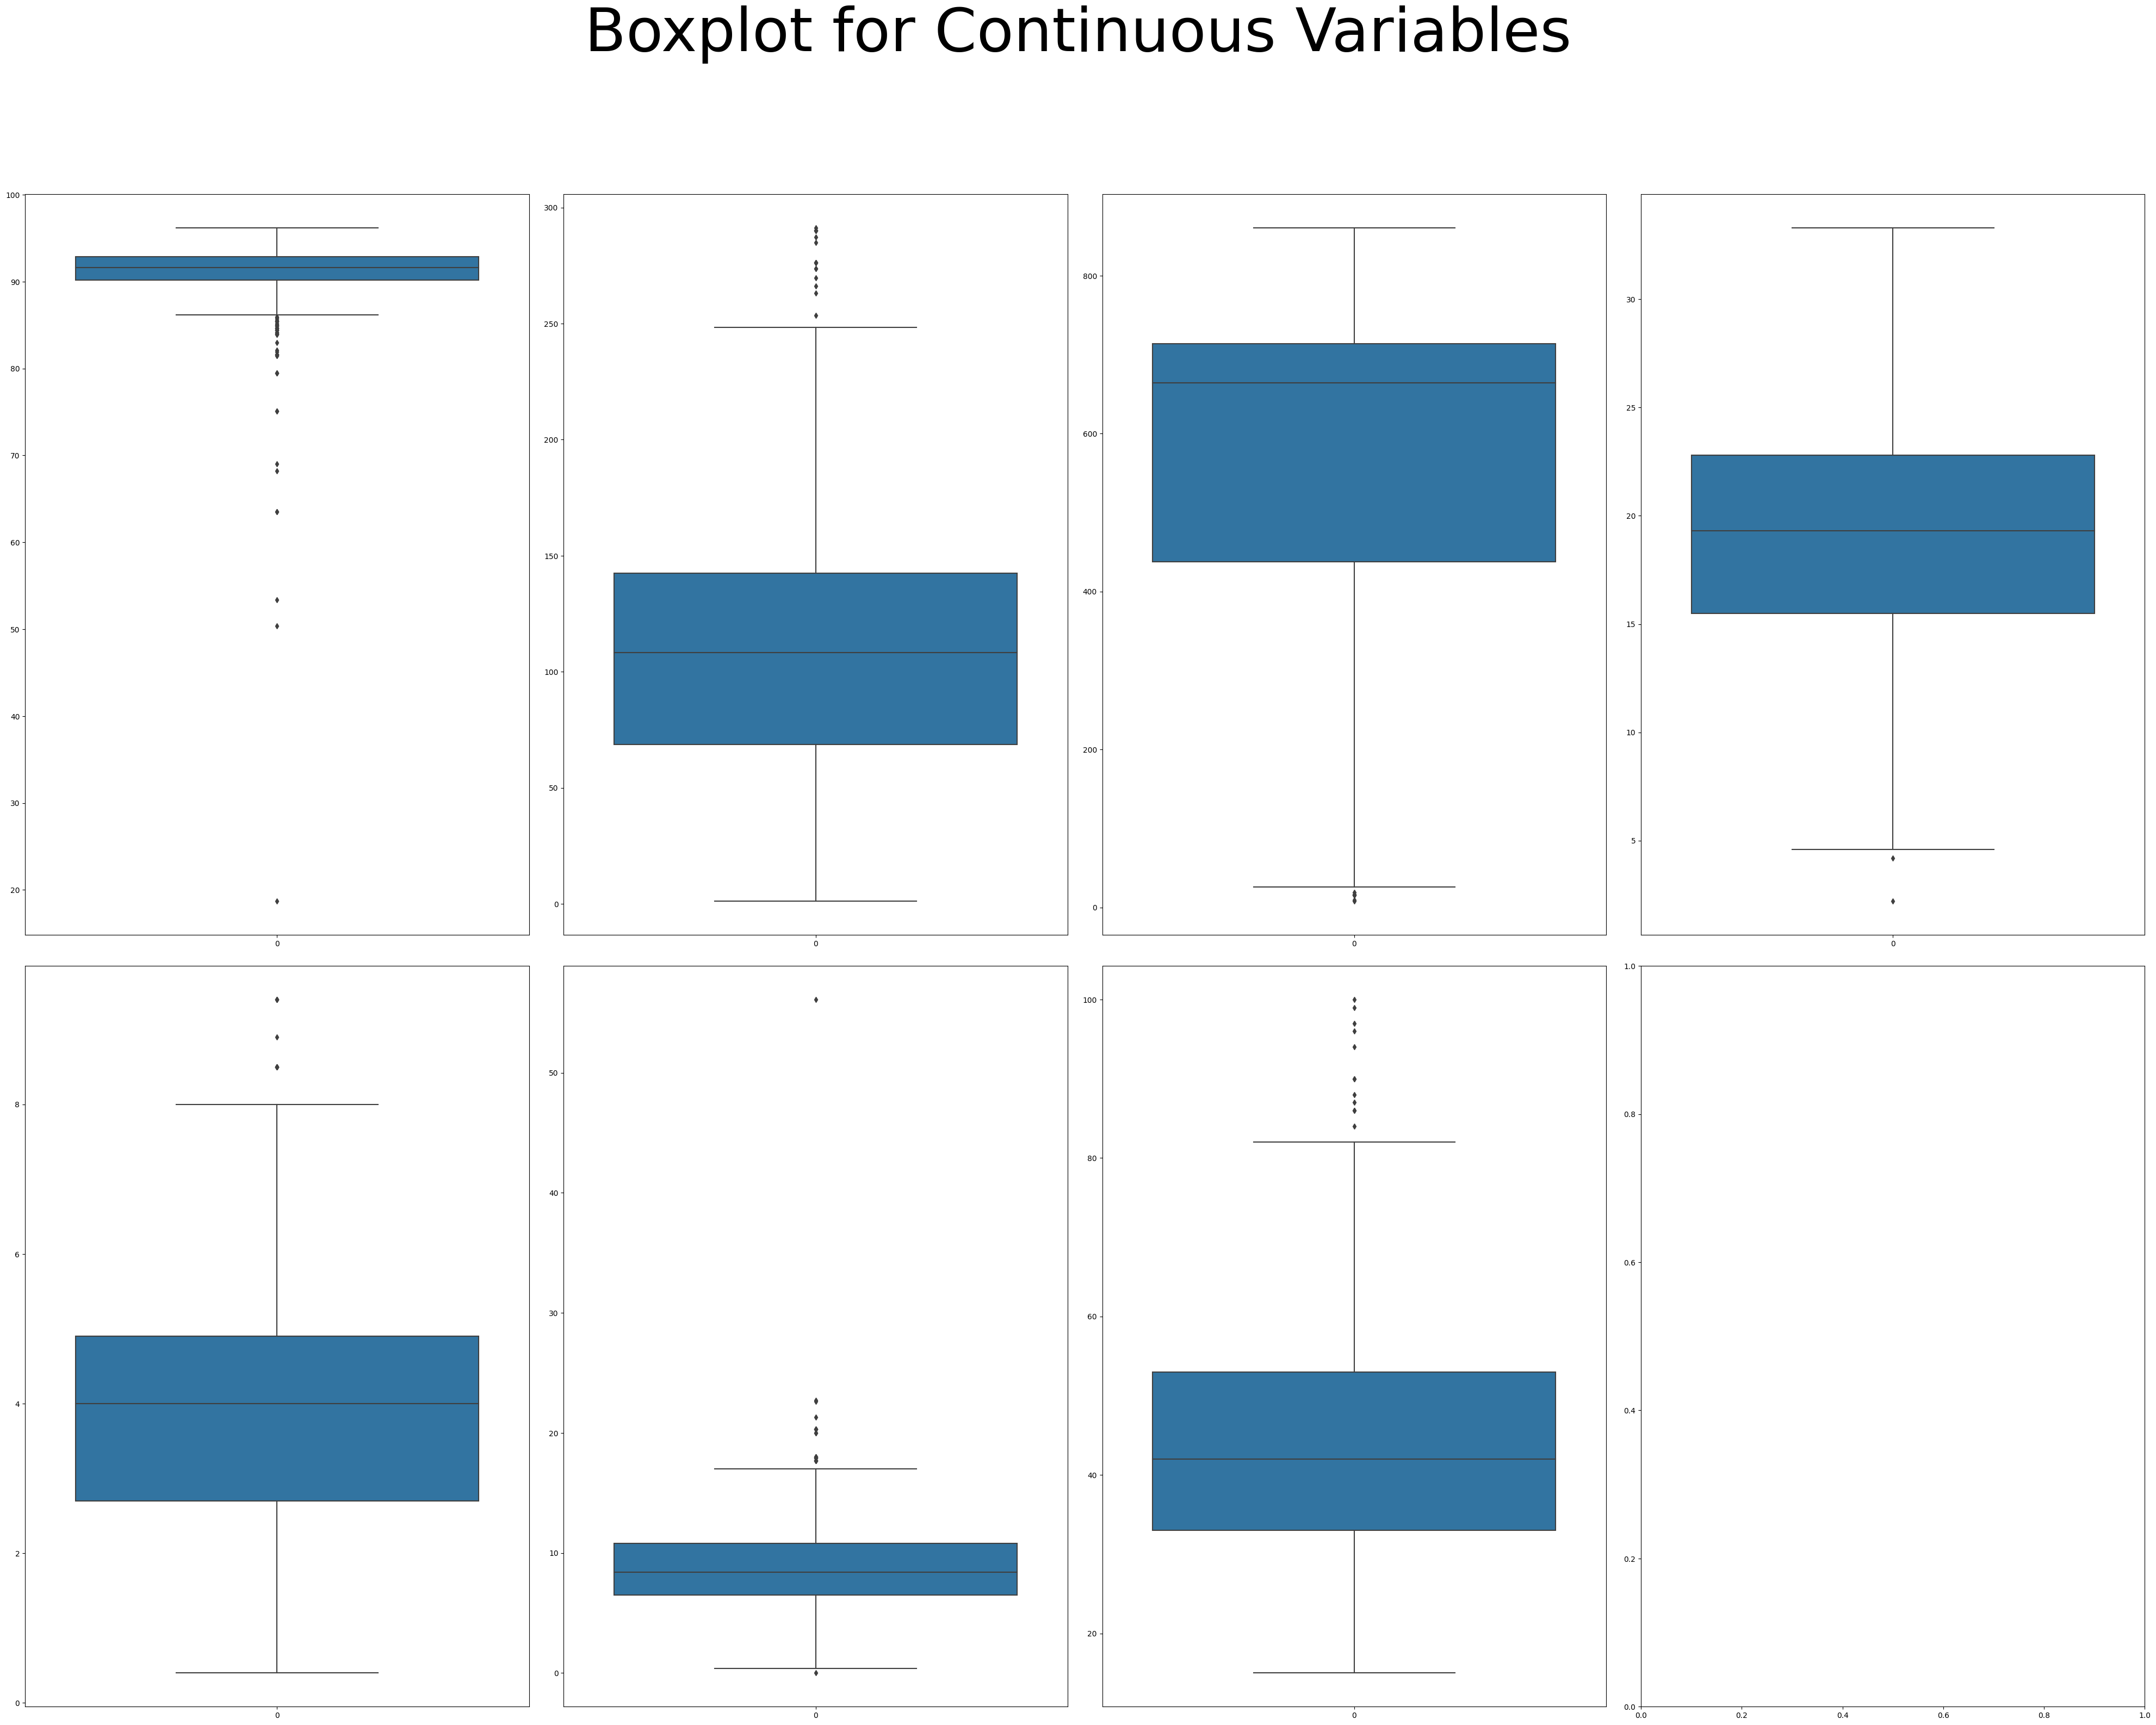

In [37]:
fig, ax=plt.subplots(2,4, figsize=(40,30))
sns.boxplot(df.FFMC, ax=ax[0,0])
sns.boxplot(df.DMC, ax=ax[0,1])
sns.boxplot(df.DC, ax=ax[0,2])
sns.boxplot(df.temp, ax=ax[0,3])
sns.boxplot(df.wind, ax=ax[1,0])
sns.boxplot(df.ISI, ax=ax[1,1])
sns.boxplot(df.RH, ax=ax[1,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 80, y = 1.06)
plt.tight_layout(pad=2.0)

# The data is very noisy

# Correlation analysis

In [38]:
df1 = df.drop(['month','day','dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'], axis=1)
df1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [39]:
corr = pd.DataFrame(data = df1.corr().iloc[:,-1], index=df1.columns)
corr

,size_category
FFMC,-0.022063
DMC,-0.034715
DC,-0.019428
ISI,0.008726
temp,-0.006021
RH,0.045243
wind,-0.059113
rain,-0.050001
area,-0.311322
size_category,1.000000


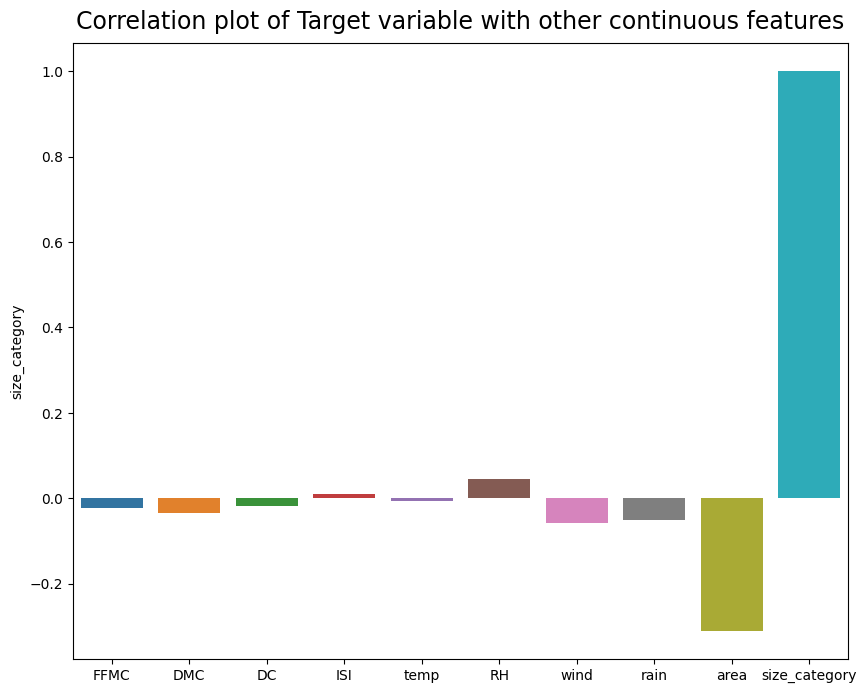

In [40]:
fig , ax = plt.subplots(figsize=(10,8))
sns.barplot(x = corr.index, y = corr.iloc[:,0])
plt.title('Correlation plot of Target variable with other continuous features', fontsize=17, y =1.01)
plt.show()

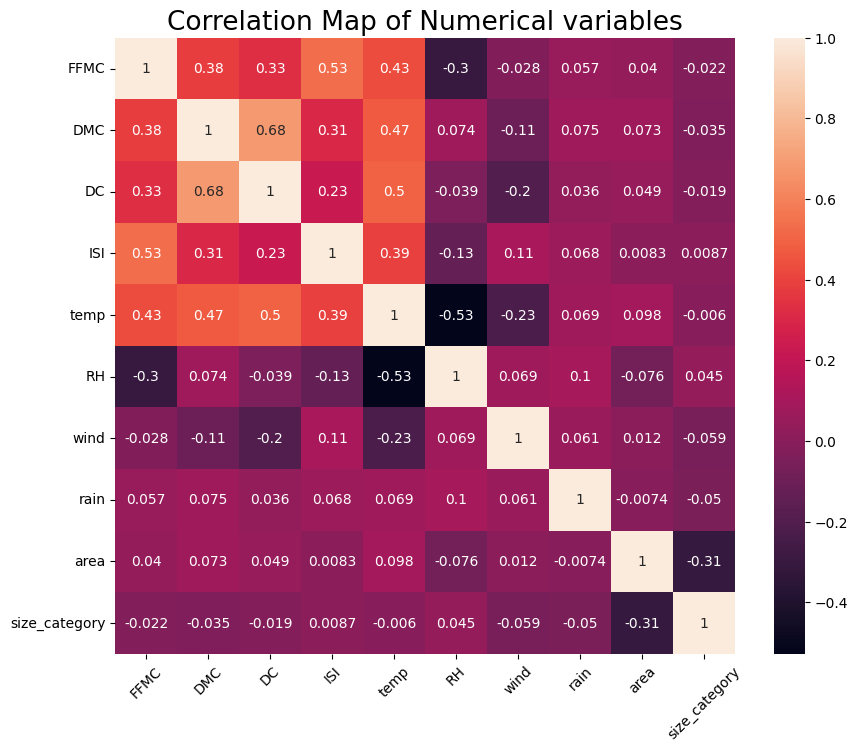

In [41]:
fig= plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True);
plt.xticks(rotation=45)
plt.title("Correlation Map of Numerical variables", fontsize=19);

# Data Preprocessing

In [42]:
df.drop(['month', 'day', 'monthjan', 'daymon'], axis=1, inplace=True)
pd.set_option("display.max_columns", 27)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


# Outliers

In [43]:
from sklearn.ensemble import IsolationForest
data1=df.copy()

#training the model
clf = IsolationForest(random_state=10, contamination=.01)
clf.fit(data1)
data1['anamoly'] = clf.predict(data1.iloc[:,0:27])
outliers = data1[data1['anamoly']==-1]

In [44]:
outliers

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,...,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,anamoly
281,85.4,25.4,349.7,2.6,5.1,24,8.5,0.0,24.77,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,-1
299,53.4,71.0,233.8,0.4,10.6,90,2.7,0.0,0.00,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,-1
379,18.7,1.1,171.4,0.0,5.2,100,0.9,0.0,0.00,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,-1
463,75.1,4.4,16.2,1.9,4.6,82,6.3,0.0,5.39,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,-1
464,75.1,4.4,16.2,1.9,5.1,77,5.4,0.0,2.14,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,-1
469,91.0,14.6,25.6,12.3,13.7,33,9.4,0.0,61.13,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0,0,0,-1


In [45]:
outliers.index

Int64Index([281, 299, 379, 463, 464, 469], dtype='int64')

In [46]:
df.drop([281, 299, 379, 463, 464, 469], axis=0, inplace=True)

In [47]:
df.shape

(511, 27)

# Splitting this data into x & y

In [48]:
x = df.drop('size_category', axis=1)
y = df['size_category']

# Data Normalization

In [49]:
norm = MinMaxScaler()
std = StandardScaler()

x_norm = pd.DataFrame(norm.fit_transform(x), columns=x.columns)
x_std = pd.DataFrame(std.fit_transform(x), columns=x.columns)

In [50]:
x_std.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-1.152145,-1.349327,-1.872882,-0.883826,-1.903660,0.439490,1.531449,-0.073700,-0.200487,2.238697,-0.440369,-0.471686,-0.368179,-0.368179,-0.343747,-0.126113,-0.750127,-0.126113,-0.191079,-0.258468,-0.179787,2.909117,-0.062684,-0.044281,-0.173902,-0.712302
1,-0.080103,-1.204539,0.475150,-0.529429,-0.180137,-0.692844,-1.758092,-0.073700,-0.200487,-0.446688,-0.440369,-0.471686,-0.368179,2.716072,-0.343747,-0.126113,-0.750127,-0.126113,-0.191079,-0.258468,-0.179787,-0.343747,-0.062684,-0.044281,5.750362,-0.712302
2,-0.080103,-1.073914,0.547862,-0.529429,-0.778094,-0.692844,-1.531227,-0.073700,-0.200487,-0.446688,2.270821,-0.471686,-0.368179,-0.368179,-0.343747,-0.126113,-0.750127,-0.126113,-0.191079,-0.258468,-0.179787,-0.343747,-0.062684,-0.044281,5.750362,-0.712302
3,0.187908,-1.237588,-1.941509,-0.019983,-1.886073,3.333233,0.000111,0.598809,-0.200487,2.238697,-0.440369,-0.471686,-0.368179,-0.368179,-0.343747,-0.126113,-0.750127,-0.126113,-0.191079,-0.258468,-0.179787,2.909117,-0.062684,-0.044281,-0.173902,-0.712302
4,-0.396842,-0.954306,-1.840611,0.112916,-1.340877,3.459048,-1.247646,-0.073700,-0.200487,-0.446688,-0.440369,2.120053,-0.368179,-0.368179,-0.343747,-0.126113,-0.750127,-0.126113,-0.191079,-0.258468,-0.179787,2.909117,-0.062684,-0.044281,-0.173902,-0.712302


# Model Building

# Splitting data into train and test

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.25)

In [52]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((383, 26), (128, 26), (383,), (128,))

In [53]:
clf = SVC()
param_grids = [{'kernel':['rbf'], 'C': [15,14,13,12,11,10,1,0.1,0.001]}]
grid = GridSearchCV(clf, param_grids, cv=20)
grid.fit(x_train,y_train)

GridSearchCV(cv=20, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 1, 0.1, 0.001],
                          'kernel': ['rbf']}])

In [54]:
grid.best_score_, grid.best_params_

(0.8276315789473683, {'C': 13, 'kernel': 'rbf'})

# RBF kernel with gamma as scale

In [55]:
clf=SVC(kernel='rbf', C=13, gamma = 'scale')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred1 = clf.predict(x_train)
acc = accuracy_score(y_pred, y_test)*100
print("Test Accuracy  =" , acc)
acc1 = accuracy_score(y_pred1, y_train)*100
print("Train Accuracy =" , acc1)
confusion_matrix(y_test, y_pred)

Test Accuracy  = 82.03125
Train Accuracy = 94.51697127937337


array([[18, 21],
       [ 2, 87]])

# RBF kernel with gamma as auto

In [56]:
clf=SVC(kernel='rbf', C=13, gamma = 'auto')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred1 = clf.predict(x_train)
acc = accuracy_score(y_pred, y_test)*100
print("Test Accuracy  =" , acc)
acc1 = accuracy_score(y_pred1, y_train)*100
print("Train Accuracy =" , acc1)
confusion_matrix(y_test, y_pred)

Test Accuracy  = 82.03125
Train Accuracy = 94.7780678851175


array([[18, 21],
       [ 2, 87]])

# Kernel = Polynomial

In [57]:
clf = SVC()
param_grids = [{'kernel':['poly'], 'degree':[0,1,2,3,4,5,6], 'C': [15,14,13,12,11,10,1,0.1,0.001]}]
grid = GridSearchCV(clf, param_grids, cv=20)
grid.fit(x_train,y_train)

GridSearchCV(cv=20, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 1, 0.1, 0.001],
                          'degree': [0, 1, 2, 3, 4, 5, 6],
                          'kernel': ['poly']}])

In [58]:
grid.best_score_, grid.best_params_

(0.8851315789473683, {'C': 15, 'degree': 1, 'kernel': 'poly'})

In [59]:
clf_p=SVC(kernel='poly', C=15, degree =1 )
clf_p.fit(x_train, y_train)
y_pred_p = clf_p.predict(x_test)
y_pred1 = clf_p.predict(x_train)
acc = accuracy_score(y_pred, y_test)*100
print("Test Accuracy  =" , acc)
acc1 = accuracy_score(y_pred1, y_train)*100
print("Train Accuracy =" , acc1)
confusion_matrix(y_test, y_pred_p)

Test Accuracy  = 82.03125
Train Accuracy = 88.77284595300262


array([[20, 19],
       [ 0, 89]])

# Kernel = Linear

In [60]:
clf = SVC()
param_grids = [{'kernel':['linear'], 'C': [15,14,13,12,11,10,1,0.1,0.001]}]
grid = GridSearchCV(clf, param_grids, cv=10)
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 1, 0.1, 0.001],
                          'kernel': ['linear']}])

In [61]:
grid.best_score_, grid.best_params_

(0.9738866396761132, {'C': 15, 'kernel': 'linear'})

In [62]:
clf_l=SVC(kernel='linear', C=11)
clf_l.fit(x_train, y_train)
y_pred_l = clf_l.predict(x_test)
acc = accuracy_score(y_pred_l, y_test)*100
y_pred1 = clf_l.predict(x_train)
acc1= accuracy_score(y_pred1, y_train)*100
print("Test Accuracy  =" , acc)
print("Train Accuracy =", acc1)
confusion_matrix(y_test, y_pred_l)

Test Accuracy  = 96.875
Train Accuracy = 98.9556135770235


array([[36,  3],
       [ 1, 88]])

# Upon building and evaluating models with various kernels and estimators, we can conclude that Linear kernel model of SVC gives us the best accuracy.